In [1]:
import sys, os

env_root = '/N/project/baby_vision_curriculum/pythonenvs/hfenv/lib/python3.10/site-packages/'
sys.path.insert(0, env_root)

In [2]:
import numpy as np
import torch, torchvision
from torchvision import transforms as tr
# from torch import nn
# from torch.nn import functional as F
import os
# import random
# import time
from tqdm import tqdm
from pathlib import Path
# import math
import argparse
import pandas as pd
import warnings
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns


import transformers


In [3]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/'

In [4]:
firststage_dir = result_root+'s1/'

In [14]:
result_files = [firststage_dir+item
               for item in os.listdir(firststage_dir)
               if item.split('_')[0]=='train']
result_files

['/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_g2_seed_212sgd.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_g0_seed_213sgd.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_g0_seed_211sgd.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_g0_seed_212sgd.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_g2_seed_211sgd.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_g3_seed_211sgd.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_g3_seed_212sgd.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_gr_seed_211sgd.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s1/train_val_scores_gr_seed_213sg

In [8]:
secondstage_dir = result_root+'s2/'

In [9]:
result_files = [secondstage_dir+item
               for item in os.listdir(secondstage_dir)
               if item.split('_')[0]=='train']
result_files

['/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s2/train_val_scores_gr_seed_213sgd_pre.gr.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s2/train_val_scores_g1_seed_211sgd_pre.g0.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s2/train_val_scores_g1_seed_211sgd_pre.g3.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s2/train_val_scores_g2_seed_213sgd_pre.g2.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s2/train_val_scores_gr_seed_212sgd_pre.gr.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s2/train_val_scores_g1_seed_213sgd_pre.g2.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s2/train_val_scores_gr_seed_211sgd_pre.gr.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s2/train_val_scores_g1_seed_212sgd_pre.g3.csv',
 '/N/project/baby_vision_curriculum/trained_mode

In [10]:
thirdstage_dir = result_root+'s3/'
result_files = [thirdstage_dir+item
               for item in os.listdir(thirdstage_dir)
               if item.split('_')[0]=='train']
result_files

['/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s3/train_val_scores_g0_seed_212sgd_pre.g2g1.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s3/train_val_scores_g2_seed_212sgd_pre.g0g1.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s3/train_val_scores_g0_seed_213sgd_pre.g2g1.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s3/train_val_scores_gr_seed_213sgd_pre.grgr.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s3/train_val_scores_gr_seed_211sgd_pre.grgr.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s3/train_val_scores_g2_seed_213sgd_pre.g0g1.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s3/train_val_scores_g2_seed_212sgd_pre.g3g1.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/s3/train_val_scores_g2_seed_211sgd_pre.g3g1.csv',
 '/N/project/baby_vision_curricu

In [8]:
# compare groups in each condition
# one subplot per stage

# differnt plot for ep
# stage, g, ep

## Short training (10 epochs)

In [6]:
# fp0 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_1123mask50_small2'
# fp0='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_800030ep.csv'
# fp2 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_1123mask50_small2'
# fp2 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_100010ep.csv'
# fp2='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_120130fps.csv'
# fp0 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may13/s1/train_val_scores_g0_seed_10110ep.csv'
# fp2 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may13/s1/train_val_scores_g2_seed_10110ep.csv'
fp0 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may13/s1/train_val_scores_g0_seed_21130fps_10ep_sgd.csv'
fp2 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may13/s1/train_val_scores_g2_seed_21130fps_10ep_sgd.csv'

fp01 =  '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1133mask50_small2_pre.g0'
fp21 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_120130fps_pre.g2.csv'
# fp20 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g0_seed_1000mask50_small2_pre.g2_10ep.csv'
fp02='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g2_seed_8000mask50_small2_pre.g0_30ep.csv'
fp20='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g0_seed_8000mask50_small2_pre.g2_30ep.csv'

fp012 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g2_seed_2323mask50_small2_pre.g0g1.csv'
fp210 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g0_seed_2323mask50_small2_pre.g2g1.csv'

fp202 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g2_seed_1122mask50_small2_pre.g2g0_10ep.csv'

In [7]:
fp_dicts1 = {'g0':fp0, 'g2': fp2}
# fp_dicts2 = {'g0g2':fp02, 'g2g0': fp20}
# # fp_dicts3 = {'g0g1g2':fp012, 'g2g1g0': fp210}
# fp_dicts1 = {'g2':fp2}
# fp_dicts2 = {'g2g1':fp21}
# fp_dicts1 = {'g2g0g2':fp2}
# fp_dicts2 = {'g2g0g2':fp20}
# fp_dicts3 = {'g2g0g2':fp202}

In [8]:
def add_protname_tocols(df, name):
    return df.rename(columns={'train_loss': name+'_train_loss', 'val_loss': name+'_val_loss'})

In [9]:
def combine_train_results_across_age(fp_dicts):
    df_list = []
    for prot_name, fp in fp_dicts.items():
        df = pd.read_csv(fp).iloc[:,1:]
        df = add_protname_tocols(df, prot_name)
        df_list.append(deepcopy(df))
#     return df_list
    df_comb = df_list[0]
    for i_df in range(1, len(df_list)):
        df_comb = df_comb.merge(df_list[i_df], on='epoch')
    return df_comb

In [10]:
xdf1 = combine_train_results_across_age(fp_dicts1)
# xdf2 = combine_train_results_across_age(fp_dicts2)
# xdf3 = combine_train_results_across_age(fp_dicts3)

In [11]:
colors = ['#4caf50', '#2e7d32', '#f44336', '#8b0000']

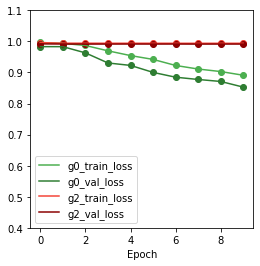

In [12]:
xdf_list = [xdf1]#, xdf2]#, xdf3]

ncol =  len(xdf_list)

fig,ax = plt.subplots(1,ncol, figsize=(ncol*4,4), sharey=True)
for i in range(ncol):
    if ncol== 1:
        cax=ax
    else:
        cax = ax[i]
    cdata = xdf_list[i]
#     sns.lineplot(data=cdata, x='epoch', ax=cax)
    for i_line, colname in enumerate(cdata.columns[1:]):
        cax.plot(cdata['epoch'], cdata[colname], color=colors[i_line], label=colname)
        cax.scatter(cdata['epoch'], cdata[colname], color=colors[i_line])
    cax.legend()
    cax.set_ylim([0.4,1.1])
    cax.set_xlabel('Epoch')
# ax[0].set_ylabel('Reconstruction Loss')
# ax[0].set_title('Stage 1: train on gx')
# ax[1].set_title('Stage 2: train on gy')
# if ncol>2:
#     ax[2].set_title('Stage 3: train on gz')

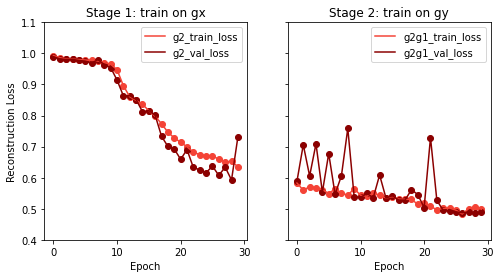

In [17]:
xdf_list = [xdf1, xdf2]#, xdf3]

ncol =  len(xdf_list)

fig,ax = plt.subplots(1,ncol, figsize=(ncol*4,4), sharey=True)
for i in range(ncol):
    cax = ax[i]
    cdata = xdf_list[i]
#     sns.lineplot(data=cdata, x='epoch', ax=cax)
    for i_line, colname in enumerate(cdata.columns[1:]):
        cax.plot(cdata['epoch'], cdata[colname], color=colors[i_line], label=colname)
        cax.scatter(cdata['epoch'], cdata[colname], color=colors[i_line])
    cax.legend()
    cax.set_ylim([0.4,1.1])
    cax.set_xlabel('Epoch')
ax[0].set_ylabel('Reconstruction Loss')
ax[0].set_title('Stage 1: train on gx')
ax[1].set_title('Stage 2: train on gy')
if ncol>2:
    ax[2].set_title('Stage 3: train on gz')

## Long training (30 epochs)

In [67]:
fp0 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_1111mask50_small2_30ep'
fp2 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_1111mask50_small2_30ep'

fp01 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1122mask50_small2_pre.g0_30ep'
fp21 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1122mask50_small2_pre.g2_30ep'

In [20]:
fp_dicts1 = {'g0':fp0, 'g2': fp2}
fp_dicts2 = {'g0g1':fp01, 'g2g1': fp21}

In [35]:
# Frame rate
fp0_10fps='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_1111mask50_small2_30ep'
fp2_10fps='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_1111mask50_small2_30ep'
fp2_30fps='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_120130fps.csv'

fp01_10fps='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1122mask50_small2_pre.g0_30ep'
fp21_10fps='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1122mask50_small2_pre.g2_30ep'
fp21_30fps='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_120130fps_pre.g2.csv'

In [63]:
fp2='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_8200sgd_mmnt9.csv'
fp0='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_8002sgd_mmnt9.csv'

fp02='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g2_seed_8002sgd_mmnt9_pre.g0.csv'
fp20='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g0_seed_8200sgd_mmnt9_pre.g2.csv'

In [64]:
fp_dicts1 = {'g0':fp0, 'g2': fp2}
fp_dicts2 = {'g0g2':fp02, 'g2g0': fp20}

In [36]:
fp_dicts1 = {'g0-10fps':fp0_10fps, 'g2-10fps': fp2_10fps, 'g2-30fps': fp2_30fps}
fp_dicts2 = {'g0g1-10fps':fp01_10fps, 'g2g1-10fps': fp21_10fps, 'g2g1-30fps': fp21_30fps}

In [65]:
xdf1 = combine_train_results_across_age(fp_dicts1)
xdf2 = combine_train_results_across_age(fp_dicts2)

In [66]:
colors = ['#4caf50', '#2e7d32', '#f44336', '#8b0000', '#1E90FF','#6495ED']

Text(0.5, 1.0, 'Stage 2: train on gy')

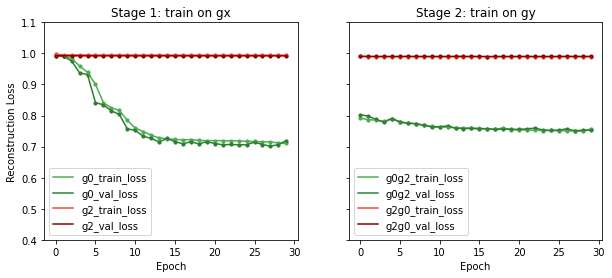

In [68]:
xdf_list = [xdf1, xdf2]

ncol = 2
fig,ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
for i in range(ncol):
    cax = ax[i]
    cdata = xdf_list[i]
#     sns.lineplot(data=cdata, x='epoch', ax=cax)
    for i_line, colname in enumerate(cdata.columns[1:]):
        cax.plot(cdata['epoch'], cdata[colname], color=colors[i_line], label=colname)
        cax.scatter(cdata['epoch'], cdata[colname], color=colors[i_line], s=10)
    cax.legend()
    cax.set_ylim([0.4,1.1])
    cax.set_xlabel('Epoch')
ax[0].set_ylabel('Reconstruction Loss')
ax[0].set_title('Stage 1: train on gx')
ax[1].set_title('Stage 2: train on gy')

Text(0.5, 1.0, 'Stage 2: train on g1')

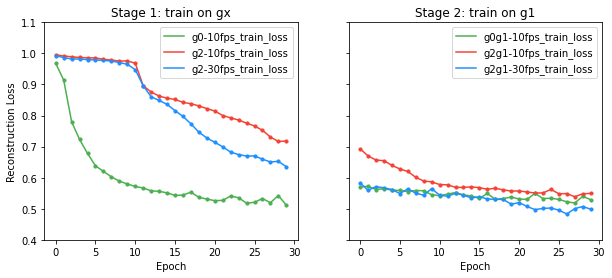

In [47]:
xdf_list = [xdf1, xdf2]

ncol = 2
fig,ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
for i in range(ncol):
    cax = ax[i]
    cdata = xdf_list[i]
#     sns.lineplot(data=cdata, x='epoch', ax=cax)
    for i_line, colname in enumerate(cdata.columns[1:-1:2]):
        cax.plot(cdata['epoch'], cdata[colname], color=colors[i_line*2], label=colname)
        cax.scatter(cdata['epoch'], cdata[colname], color=colors[i_line*2], s=10)
    cax.legend()
    cax.set_ylim([0.4,1.1])
    cax.set_xlabel('Epoch')
ax[0].set_ylabel('Reconstruction Loss')
ax[0].set_title('Stage 1: train on gx')
ax[1].set_title('Stage 2: train on g1')

### May14 Jobs Results

In [4]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/'

In [8]:
def get_tag(fp):
    # g0g1g2, g2g1g0, g3g1g2, grgrgr, g2g2g2
    stem = Path(fp).stem
    parts = stem.split('_')
    glast = parts[3]
    
    if 'pre' in stem:
        gpre = parts[-1]
        gpre = gpre.replace('pre.', '')
        
        full_tag = gpre+glast
    else:
        full_tag = glast
    
    if 'gr' in full_tag:
        return 'grgrgr'
    
    # single stage
    if full_tag=='g0':
        return 'g0g1g2'
    elif full_tag=='g3':
        return 'g3g1g2'
    elif full_tag=='g2':
        return 'g2g1g0'
    
    # 2 stage
    elif full_tag=='g0g1':
        return 'g0g1g2'
    elif full_tag=='g2g1':
        return 'g2g1g0'
    elif full_tag=='g2g2':
        return 'g2g2g2'
    elif full_tag=='g3g1':
        return 'g3g1g2'
    
    else:
        return full_tag
    

def edit_epoch(df, st):
    n_ep = 5
    iter_per_ep = 1000
    df['epoch'] += 1+(st-1)*n_ep
#     new_row = pd.DataFrame({'epoch': [0], 
#                         'train_loss': [1.15],
#                        'val_loss': [1.15]})
#     df = pd.concat([new_row, df]).reset_index(drop=True)
    df['iteration'] = iter_per_ep*df['epoch']
    
    return df

def add_tag(df, tag):
    df['curriculum'] = tag
    return df

In [9]:
# for fp in result_files:
#     print(fp.split('/')[-1])
#     print(get_tag(fp))

In [10]:
# stage = 3
# fp = result_files[0]
# xdf0 = pd.read_csv(fp).iloc[:,1:]
# xdf0 = edit_epoch(xdf0, stage)
# tag = get_tag(fp)
# xdf0 = add_tag(xdf0, tag)
# xdf0

In [11]:
tagname_dict = {'g0g1g2': 'Dev. (g0-g1-g2)', 
           'g2g1g0':'Anti-Dev. (g2-g1-g0)',
           'g3g1g2':'Adult (adult-g1-g2)',
           'g2g2g2':'Oldest Only (g2-g2-g2)',
           'grgrgr':'Random (rand-rand-rand)',
               'g0g0g0': 'Youngest Only (g0-g0-g0)'}
    
    
def proc_fp(fp, stage):
    df = pd.read_csv(fp).iloc[:,1:]
    df = edit_epoch(df, stage)
    tag = get_tag(fp)
    tag = tagname_dict[tag]
    df = add_tag(df, tag)
    return df

In [58]:
all_df = []

for stage in range(1,4):
    result_dir = result_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp(fp, stage)
        all_df.append(df)

In [59]:
df_all = pd.concat(all_df)
df_all = df_all[['curriculum', 'epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})
df_all

,Curriculum,Epoch,Iteration,Train Loss,Validation Loss
0,Anti-Dev. (g2-g1-g0),1,1000,0.9963,0.9918
1,Anti-Dev. (g2-g1-g0),2,2000,0.9943,0.9916
2,Anti-Dev. (g2-g1-g0),3,3000,0.9942,0.9915
3,Anti-Dev. (g2-g1-g0),4,4000,0.9941,0.9916
4,Anti-Dev. (g2-g1-g0),5,5000,0.9941,0.9916
...,...,...,...,...,...
0,Dev. (g0-g1-g2),11,11000,0.9289,0.9187
1,Dev. (g0-g1-g2),12,12000,0.9187,0.9057
2,Dev. (g0-g1-g2),13,13000,0.9066,0.8946
3,Dev. (g0-g1-g2),14,14000,0.9004,0.8890


In [60]:
df_all.to_csv('data_convergence.csv', index=False)

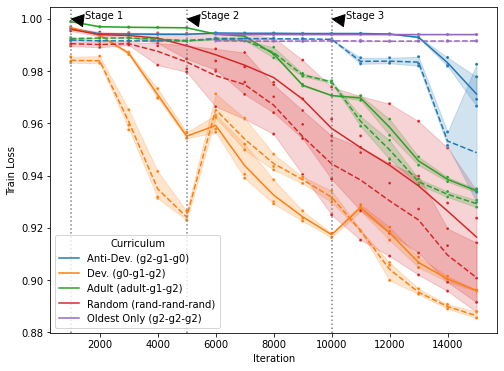

In [64]:
fig,ax = plt.subplots(1,1, figsize=(8,6))
sns.lineplot(data=df_all, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax)
sns.scatterplot(data=df_all, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10)
sns.lineplot(data=df_all, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, linestyle='--', legend=False)
sns.scatterplot(data=df_all, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10)

ax.axvline(x=1000, color='gray', linestyle=':')
ax.axvline(x=5000, color='gray', linestyle=':')
ax.axvline(x=10000, color='gray', linestyle=':')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('fig1-a.pdf', dpi=300)

### Oldest only and Youngest only

In [12]:
def get_tag(fp):
    # g0g1g2, g2g1g0, g3g1g2, grgrgr, g2g2g2
    stem = Path(fp).stem
    parts = stem.split('_')
    glast = parts[3]
    
    return glast+glast+glast

In [ ]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may15/'

only_df = []

for stage in range(1,4):
    result_dir = result_root+'s'+str(stage)+'/'#tmp/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    print('------------ stage', stage)
    for fp in result_files:
        print(fp)
        print(get_tag(fp))
        df = proc_fp(fp, stage)
        only_df.append(df)

In [14]:
df_all = pd.concat(only_df)
df_all = df_all[['curriculum', 'epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})
df_all

,Curriculum,Epoch,Iteration,Train Loss,Validation Loss
0,Oldest Only (g2-g2-g2),1,1000,0.9953,0.9910
1,Oldest Only (g2-g2-g2),2,2000,0.9933,0.9905
2,Oldest Only (g2-g2-g2),3,3000,0.9932,0.9906
3,Oldest Only (g2-g2-g2),4,4000,0.9930,0.9901
4,Oldest Only (g2-g2-g2),5,5000,0.9928,0.9902
...,...,...,...,...,...
0,Youngest Only (g0-g0-g0),11,11000,0.9417,0.9527
1,Youngest Only (g0-g0-g0),12,12000,0.9216,0.9404
2,Youngest Only (g0-g0-g0),13,13000,0.9096,0.9350
3,Youngest Only (g0-g0-g0),14,14000,0.9016,0.9315


Text(10500, 1, 'Stage 3')

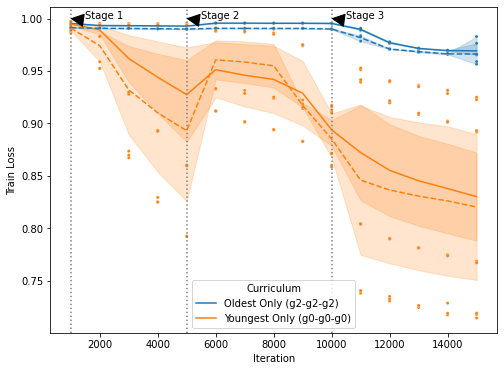

In [15]:
fig,ax = plt.subplots(1,1, figsize=(8,6))
sns.lineplot(data=df_all, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax)
sns.scatterplot(data=df_all, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10)
sns.lineplot(data=df_all, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, linestyle='--', legend=False)
sns.scatterplot(data=df_all, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10)

ax.axvline(x=1000, color='gray', linestyle=':')
ax.axvline(x=5000, color='gray', linestyle=':')
ax.axvline(x=10000, color='gray', linestyle=':')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))

# plt.savefig('fig1-a.pdf', dpi=300)

## 000 vs 012

In [16]:
def get_tag(fp):
    # g0g1g2, g2g1g0, g3g1g2, grgrgr, g2g2g2
    stem = Path(fp).stem
    parts = stem.split('_')
    glast = parts[3]
    
    if 'pre' in stem:
        gpre = parts[-1]
        gpre = gpre.replace('pre.', '')
        
        full_tag = gpre+glast
    else:
        full_tag = glast
    
    if 'gr' in full_tag:
        return 'grgrgr'
    
    # single stage
    if full_tag=='g0':
        return 'g0g1g2'
    elif full_tag=='g3':
        return 'g3g1g2'
    elif full_tag=='g2':
        return 'g2g1g0'
    
    # 2 stage
    elif full_tag=='g0g1':
        return 'g0g1g2'
    elif full_tag=='g0g0':
        return 'g0g0g0'
    elif full_tag=='g2g1':
        return 'g2g1g0'
    elif full_tag=='g2g2':
        return 'g2g2g2'
    elif full_tag=='g3g1':
        return 'g3g1g2'
    
    else:
        return full_tag

In [17]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may15/'

only_df = []

for stage in range(2,4):
    result_dir = result_root+'s'+str(stage)+'/'#tmp/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    print('------------ stage', stage)
    for fp in result_files:
        print(fp)
        print(get_tag(fp))
        df = proc_fp(fp, stage)
        only_df.append(df)

------------ stage 2
/N/project/baby_vision_curriculum/trained_models/generative/v2/may15/s2/train_val_scores_g1_seed_721_adamw_pre.g0.csv
g0g1g2
/N/project/baby_vision_curriculum/trained_models/generative/v2/may15/s2/train_val_scores_g0_seed_721_adamw_pre.g0.csv
g0g0g0
------------ stage 3
/N/project/baby_vision_curriculum/trained_models/generative/v2/may15/s3/train_val_scores_g0_seed_721adamw_pre.g0g0.csv
g0g0g0
/N/project/baby_vision_curriculum/trained_models/generative/v2/may15/s3/train_val_scores_g2_seed_721adamw_pre.g0g1.csv
g0g1g2


In [18]:
df_all = pd.concat(only_df)
df_all = df_all[['curriculum', 'epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})
df_all

,Curriculum,Epoch,Iteration,Train Loss,Validation Loss
0,Dev. (g0-g1-g2),6,6000,0.8095,0.7640
1,Dev. (g0-g1-g2),7,7000,0.7916,0.7517
2,Dev. (g0-g1-g2),8,8000,0.7795,0.7445
3,Dev. (g0-g1-g2),9,9000,0.7697,0.7348
4,Dev. (g0-g1-g2),10,10000,0.7613,0.7297
5,Dev. (g0-g1-g2),11,11000,0.7541,0.7240
6,Dev. (g0-g1-g2),12,12000,0.7475,0.7182
7,Dev. (g0-g1-g2),13,13000,0.7417,0.7141
8,Dev. (g0-g1-g2),14,14000,0.7364,0.7103
9,Dev. (g0-g1-g2),15,15000,0.7312,0.7060


Text(10500, 1, 'Stage 3')

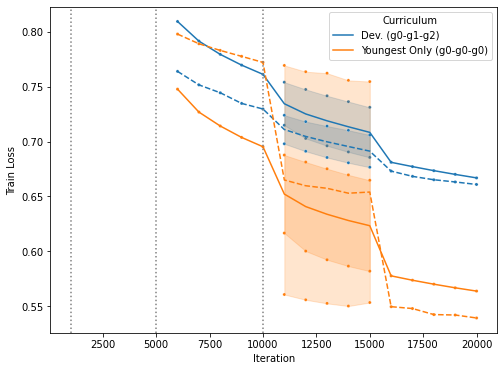

In [19]:
fig,ax = plt.subplots(1,1, figsize=(8,6))
sns.lineplot(data=df_all, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax)
sns.scatterplot(data=df_all, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10)
sns.lineplot(data=df_all, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, linestyle='--', legend=False)
sns.scatterplot(data=df_all, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10)

ax.axvline(x=1000, color='gray', linestyle=':')
ax.axvline(x=5000, color='gray', linestyle=':')
ax.axvline(x=10000, color='gray', linestyle=':')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))

# plt.savefig('fig1-a.pdf', dpi=300)